# Install the cogent maths package for python

* Download the requirements file
* Install cogent-1.5.3 (Knight lab)

In [3]:
%%bash
wget "http://pycogent.org/_downloads/cogent-requirements.txt"
pip install -r ./cogent-requirements.txt

--2016-02-04 10:57:01--  http://pycogent.org/_downloads/cogent-requirements.txt
Resolving pycogent.org... 192.30.252.154, 192.30.252.153
Connecting to pycogent.org|192.30.252.154|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20 [text/plain]
Saving to: “cogent-requirements.txt.3”

     0K                                                       100% 1.36M=0s

2016-02-04 10:57:01 (1.36 MB/s) - “cogent-requirements.txt.3” saved [20/20]



* * *

# Run correlations:

In [10]:
from numpy import argsort, abs, take

In [11]:
from numpy.random import normal, permutation

In [12]:
from cogent.maths.stats.test import regress, correlation

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def correlations(num_points, num_dropped, num_iters):
    #make up completely random x and y and calculate the correlation
    x = normal(0,1,num_points)
    y = normal(0,1,num_points)
    corr = correlation(x,y)
    print 'Original correlation:', corr
    
    #randomly choose some points to drop, and see if the correlation
    #is better. stop after num_iters trials.
    best_r2 = corr[0]**2
    best_corr = corr
    best_x = x
    best_y = y
    for i in range(num_iters):
        p = permutation(num_points)
        new_x = x[p[:-num_dropped]]
        new_y = y[p[:-num_dropped]]
        new_corr = correlation(new_x, new_y)
        new_r2 = new_corr[0]**2
        if new_r2 > best_r2:
            best_r2 = new_r2
            best_corr = new_corr
            best_x = new_x
            best_y = new_y

    #figure out the slopes and intercepts with and without the dropped
    #points, and plot both the points and the regression lines.
    print 'New correlation:', best_corr

    slope, intercept = regress(x,y)
    pred_y = (x*slope)+intercept
    plt.plot(x,pred_y, c='r')

    best_slope, best_intercept = regress(best_x,best_y)
    pred_best_y = (best_x*best_slope)+best_intercept
    plt.plot(best_x,pred_best_y, c='b')

    plt.scatter(x,y, c='r')
    plt.scatter(best_x, best_y, c='b')
    plt.show()

Original correlation: (-0.36800490115673667, 0.29543695306083373)
New correlation: (-0.81279559328636908, 0.014185046642270013)


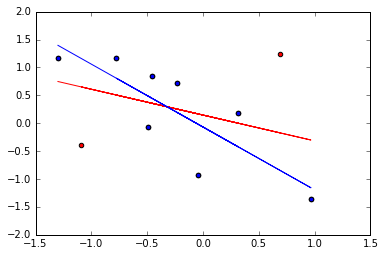

In [21]:
correlations(10, 2, 1000)

**If the code above runs successfully, you should see a pop-up window with a 2-d plot.**

_NOTE: The pop-up will only appear once per-execution.  Do not run the code block multiple times or you will see many new pop-ups when you close the first!_